<a href="https://colab.research.google.com/github/ogaihtsed/lia1_2024_1/blob/main/Entregas%20-%20Thiago%20Gomes/Projeto_Aula_08.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Projeto Ponta a Ponta - Construindo um Modelo com Tensorflow - Fashion Mnist**
**Problema**: construir um modelo de Inteligência Artificial capaz de classificar imagens, considerando 10 categorias de moda, sendo: T-shirt/top; Trouser; Pullover; Dress; Coat; Sandal; Shirt; Sneaker; Bag; Ankle boot.

Não há mágica. Há matemática! 🧙

**Fonte de dados**

O conjunto de dados [Fashion MNIST](https://keras.io/api/datasets/fashion_mnist/) com 60.000 imagens em escala de cinza (28x28) de 10 categorias de moda, junto com um conjunto de teste de 10.000 imagens. Existem 50.000 imagens de treinamento e 10.000 imagens de teste.

In [1]:
# Importando o necessário
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image

### Carregando os dados de Treino e Teste

In [2]:
# Carrega o dataset Fashion MNIST - Já está no Keras!
(imagens_treino, labels_treino), (imagens_teste, labels_teste) = datasets.fashion_mnist.load_data()

In [3]:
# Classes das imagens
nomes_classes = ['Camiseta', 'Calça', 'Suéter', 'Vestido', 'Casaco', 'Sandália', 'Camisa', 'Tênis', 'Bolsa', 'Bota']

### Pré-processamento
Fazer pré-processamento nos dados, em nosso caso as imagens.

In [4]:
# Normaliza os valores dos pixels para que os dados fiquem na mesma escala
imagens_treino = imagens_treino / 255.0
imagens_teste = imagens_teste / 255.0

In [5]:
# Função para exibir as imagens
def visualiza_imagens(images, labels):
    plt.figure(figsize = (10,10))
    for i in range(36):
        plt.subplot(6, 6, i+1)
        plt.xticks([])
        plt.yticks([])
        plt.grid(False)
        plt.imshow(images[i], cmap = plt.cm.binary)
        plt.xlabel(nomes_classes[labels[i]])
    plt.show()

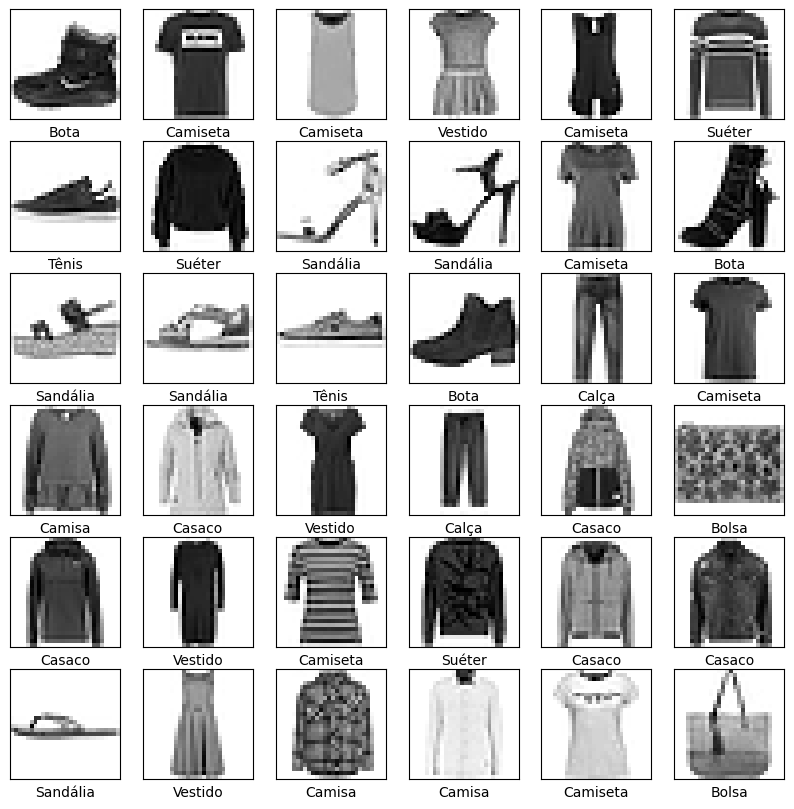

In [6]:
# Executa a função
visualiza_imagens(imagens_treino, labels_treino)

### Construindo a Rede Neural Convolucional
O Keras é uma biblioteca do TensorFlow.

In [7]:
# Arquitetura do Modelo -> Feature Learning

# Cria o objeto de sequência de camadas - do Keras
modelo_lia = models.Sequential()

# Adiciona a primeira camada de convolução e max pooling (camada de entrada)
modelo_lia.add(layers.Conv2D(28, (3, 3), activation = 'relu', input_shape = (28, 28, 1)))
modelo_lia.add(layers.MaxPooling2D((2, 2)))

# Adiciona a segunda camada de convolução e max pooling (camada intermediária)
modelo_lia.add(layers.Conv2D(64, (3, 3), activation = 'relu'))
modelo_lia.add(layers.MaxPooling2D((2, 2)))

# Adiciona a terceira camada de convolução e max pooling (camada intermediária)
modelo_lia.add(layers.Conv2D(64, (3, 3), activation = 'relu'))
modelo_lia.add(layers.MaxPooling2D((2, 2)))

In [8]:
# Adicionar camadas de classificação - Converte para um vetor - flatten
modelo_lia.add(layers.Flatten())
modelo_lia.add(layers.Dense(64, activation = 'relu'))
modelo_lia.add(layers.Dense(10, activation = 'softmax'))

In [9]:
# Compilação do modelo
modelo_lia.compile(optimizer = 'adam',
                   loss = 'sparse_categorical_crossentropy',
                   metrics = ['accuracy'])

# adam - é um algoritmo de aprendizagem tipo backpropagation!
# loss - função de erro. Isso se resume a uma otimização função matemática!
# metrics - medir o sucesso!

### Treinamento

In [10]:
# Executando o treinamento
%%time
history = modelo_lia.fit(imagens_treino,
                         labels_treino,
                         epochs = 15,
                         validation_data = (imagens_teste, labels_teste))

Epoch 1/15
1875/1875 [==============================] - 15s 4ms/step - loss: 0.5975 - accuracy: 0.7801 - val_loss: 0.4659 - val_accuracy: 0.8256
Epoch 2/15
1875/1875 [==============================] - 8s 4ms/step - loss: 0.4090 - accuracy: 0.8503 - val_loss: 0.4218 - val_accuracy: 0.8480
Epoch 3/15
1875/1875 [==============================] - 8s 4ms/step - loss: 0.3533 - accuracy: 0.8697 - val_loss: 0.3776 - val_accuracy: 0.8599
Epoch 4/15
1875/1875 [==============================] - 8s 4ms/step - loss: 0.3143 - accuracy: 0.8842 - val_loss: 0.3418 - val_accuracy: 0.8772
Epoch 5/15
1875/1875 [==============================] - 8s 4ms/step - loss: 0.2882 - accuracy: 0.8938 - val_loss: 0.3170 - val_accuracy: 0.8836
Epoch 6/15
1875/1875 [==============================] - 8s 4ms/step - loss: 0.2660 - accuracy: 0.9007 - val_loss: 0.3100 - val_accuracy: 0.8894
Epoch 7/15
1875/1875 [==============================] - 7s 4ms/step - loss: 0.2474 - accuracy: 0.9080 - val_loss: 0.3062 - val_accuracy

### Previsão - Testar o modelo (Deploy)

Testar o modelo treinado com imagens que ele ainda não viu. Por fim, verificamos o resultado da previsão e emitimos a informação sobre a classe.

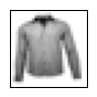

In [11]:
# Carrega uma nova imagem
nova_imagem = Image.open("/content/images/camisa.jpg")

# Redimensiona para 28x28 pixels
# Converte para escala de cinza
nova_imagem = nova_imagem.convert('L')
nova_imagem = nova_imagem.resize((28, 28))

# Exibir a imagem
plt.figure(figsize = (1,1))
plt.imshow(nova_imagem, cmap='gray')
plt.xticks([])
plt.yticks([])
plt.show()

In [12]:
# Converte a imagem para um array NumPy e normaliza
nova_imagem_array = np.array(nova_imagem) / 255.0

In [13]:
# Expande a dimensão do array para que ele tenha o formato (1, 28, 28, 1)
nova_imagem_array = np.expand_dims(nova_imagem_array, axis = 0)

In [18]:
# Fazendo a previsão!
previsoes = modelo_lia.predict(nova_imagem_array)

1/1 [==============================] - 0s 18ms/step


In [19]:
print(previsoes)

[[0.05960406 0.04722686 0.02024348 0.02767655 0.01459338 0.01173258
  0.14703012 0.00546894 0.64871323 0.01771089]]


In [20]:
# Obtém a classe com maior probabilidade e o nome da classe
classe_prevista = np.argmax(previsoes)
nome_classe_prevista = nomes_classes[classe_prevista]

In [21]:
print("A nova imagem foi classificada como:", nome_classe_prevista)

A nova imagem foi classificada como: Bolsa
